### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import math

%matplotlib inline

In [2]:
# pip install ydata-profiling
# from ydata_profiling import ProfileReport

### Read data

In [3]:
data = pd.read_csv("Student Depression Dataset.csv", thousands=',', skipinitialspace=True)
data

id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
27896            0.0  5.75                 5.0               0.0   
27897            0.0  9.40                 3.0               0.0   
27898            0.0  6.61                 4.0               0.0   
27899            0.0  6.88                 2.0               0.0   
27900            0.0  9.24                 1.0               0.0   

          Sleep Duration Dietary Habits    Degree  \
0              5-6 hours        Healthy   B.Pharm   
1              5-6 hours       Moderate       BSc   
2      Less than 5 hours        Healthy        BA   
3              7-8 hours       Moderate       BCA   
4              5-6 hours       Moderate    M.Tech   
...                  ...            ...       ...   
27896          5-6 hours      Unhealthy  Class 12   
27897  Less than 5 hours        Healthy       MSc   
27898          5-6 hours      Unhealthy        MD   
27899  Less than 5 hours        Healthy  Class 12   
27900  Less than 5 hours        Healthy       BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

       Financial Stress Family History of Mental Illness  Depression  
0                   1.0                               No           1  
1                   2.0                              Yes           0  
2                   1.0                              Yes           0  
3                   5.0                              Yes           1  
4                   1.0                               No           0  
...                 ...                              ...         ...  
27896               1.0                              Yes           0  
27897               3.0                              Yes           0  
27898               2.0                               No           0  
27899               5.0                               No           1  
27900               3.0                              Yes           1  

[27901 row

### Drop empty lines in data and remove NAN's

In [4]:
print(data.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [5]:
data = data.dropna()
data

id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
27896            0.0  5.75                 5.0               0.0   
27897            0.0  9.40                 3.0               0.0   
27898            0.0  6.61                 4.0               0.0   
27899            0.0  6.88                 2.0               0.0   
27900            0.0  9.24                 1.0               0.0   

          Sleep Duration Dietary Habits    Degree  \
0              5-6 hours        Healthy   B.Pharm   
1              5-6 hours       Moderate       BSc   
2      Less than 5 hours        Healthy        BA   
3              7-8 hours       Moderate       BCA   
4              5-6 hours       Moderate    M.Tech   
...                  ...            ...       ...   
27896          5-6 hours      Unhealthy  Class 12   
27897  Less than 5 hours        Healthy       MSc   
27898          5-6 hours      Unhealthy        MD   
27899  Less than 5 hours        Healthy  Class 12   
27900  Less than 5 hours        Healthy       BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

       Financial Stress Family History of Mental Illness  Depression  
0                   1.0                               No           1  
1                   2.0                              Yes           0  
2                   1.0                              Yes           0  
3                   5.0                              Yes           1  
4                   1.0                               No           0  
...                 ...                              ...         ...  
27896               1.0                              Yes           0  
27897               3.0                              Yes           0  
27898               2.0                               No           0  
27899               5.0                               No           1  
27900               3.0                              Yes           1  

[27898 row

### Reset the index for potentially removed rows in data

In [6]:
data = data.reset_index(drop=True)
data

id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27893  140685  Female  27.0          Surat    Student                5.0   
27894  140686    Male  27.0       Ludhiana    Student                2.0   
27895  140689    Male  31.0      Faridabad    Student                3.0   
27896  140690  Female  18.0       Ludhiana    Student                5.0   
27897  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
27893            0.0  5.75                 5.0               0.0   
27894            0.0  9.40                 3.0               0.0   
27895            0.0  6.61                 4.0               0.0   
27896            0.0  6.88                 2.0               0.0   
27897            0.0  9.24                 1.0               0.0   

          Sleep Duration Dietary Habits    Degree  \
0              5-6 hours        Healthy   B.Pharm   
1              5-6 hours       Moderate       BSc   
2      Less than 5 hours        Healthy        BA   
3              7-8 hours       Moderate       BCA   
4              5-6 hours       Moderate    M.Tech   
...                  ...            ...       ...   
27893          5-6 hours      Unhealthy  Class 12   
27894  Less than 5 hours        Healthy       MSc   
27895          5-6 hours      Unhealthy        MD   
27896  Less than 5 hours        Healthy  Class 12   
27897  Less than 5 hours        Healthy       BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27893                                   Yes               7.0   
27894                                    No               0.0   
27895                                    No              12.0   
27896                                   Yes              10.0   
27897                                   Yes               2.0   

       Financial Stress Family History of Mental Illness  Depression  
0                   1.0                               No           1  
1                   2.0                              Yes           0  
2                   1.0                              Yes           0  
3                   5.0                              Yes           1  
4                   1.0                               No           0  
...                 ...                              ...         ...  
27893               1.0                              Yes           0  
27894               3.0                              Yes           0  
27895               2.0                               No           0  
27896               5.0                               No           1  
27897               3.0                              Yes           1  

[27898 row

#### Also delete constant values and unimportant fields


In [7]:
data = data.drop(columns=["id"]) 
data

Gender   Age           City Profession  Academic Pressure  \
0        Male  33.0  Visakhapatnam    Student                5.0   
1      Female  24.0      Bangalore    Student                2.0   
2        Male  31.0       Srinagar    Student                3.0   
3      Female  28.0       Varanasi    Student                3.0   
4      Female  25.0         Jaipur    Student                4.0   
...       ...   ...            ...        ...                ...   
27893  Female  27.0          Surat    Student                5.0   
27894    Male  27.0       Ludhiana    Student                2.0   
27895    Male  31.0      Faridabad    Student                3.0   
27896  Female  18.0       Ludhiana    Student                5.0   
27897    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
27893            0.0  5.75                 5.0               0.0   
27894            0.0  9.40                 3.0               0.0   
27895            0.0  6.61                 4.0               0.0   
27896            0.0  6.88                 2.0               0.0   
27897            0.0  9.24                 1.0               0.0   

          Sleep Duration Dietary Habits    Degree  \
0              5-6 hours        Healthy   B.Pharm   
1              5-6 hours       Moderate       BSc   
2      Less than 5 hours        Healthy        BA   
3              7-8 hours       Moderate       BCA   
4              5-6 hours       Moderate    M.Tech   
...                  ...            ...       ...   
27893          5-6 hours      Unhealthy  Class 12   
27894  Less than 5 hours        Healthy       MSc   
27895          5-6 hours      Unhealthy        MD   
27896  Less than 5 hours        Healthy  Class 12   
27897  Less than 5 hours        Healthy       BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27893                                   Yes               7.0   
27894                                    No               0.0   
27895                                    No              12.0   
27896                                   Yes              10.0   
27897                                   Yes               2.0   

       Financial Stress Family History of Mental Illness  Depression  
0                   1.0                               No           1  
1                   2.0                              Yes           0  
2                   1.0                              Yes           0  
3                   5.0                              Yes           1  
4                   1.0                               No           0  
...                 ...                              ...         ...  
27893               1.0                              Yes           0  
27894               3.0                              Yes           0  
27895               2.0                               No           0  
27896               5.0                               No           1  
27897               3.0                              Yes           1  

[27898 rows x 17 columns]

In [8]:
print(data.dtypes)
for col in data.columns:
    print(f"{col}: {data[col].nunique()} valori unice")

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object
Gender: 2 valori unice
Age: 34 valori unice
City: 52 valori unice
Profession: 14 valori unice
Academic Pressure: 6 valori unice
Work Pressure: 3 valori u

In [9]:
cols_to_drop = ['City', 'Profession', 'Degree' ]
data = data.drop(columns=cols_to_drop)

In [10]:
data = data.reset_index(drop=True)
data

Gender   Age  Academic Pressure  Work Pressure  CGPA  \
0        Male  33.0                5.0            0.0  8.97   
1      Female  24.0                2.0            0.0  5.90   
2        Male  31.0                3.0            0.0  7.03   
3      Female  28.0                3.0            0.0  5.59   
4      Female  25.0                4.0            0.0  8.13   
...       ...   ...                ...            ...   ...   
27893  Female  27.0                5.0            0.0  5.75   
27894    Male  27.0                2.0            0.0  9.40   
27895    Male  31.0                3.0            0.0  6.61   
27896  Female  18.0                5.0            0.0  6.88   
27897    Male  27.0                4.0            0.0  9.24   

       Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                     2.0               0.0          5-6 hours        Healthy   
1                     5.0               0.0          5-6 hours       Moderate   
2                     5.0               0.0  Less than 5 hours        Healthy   
3                     2.0               0.0          7-8 hours       Moderate   
4                     3.0               0.0          5-6 hours       Moderate   
...                   ...               ...                ...            ...   
27893                 5.0               0.0          5-6 hours      Unhealthy   
27894                 3.0               0.0  Less than 5 hours        Healthy   
27895                 4.0               0.0          5-6 hours      Unhealthy   
27896                 2.0               0.0  Less than 5 hours        Healthy   
27897                 1.0               0.0  Less than 5 hours        Healthy   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27893                                   Yes               7.0   
27894                                    No               0.0   
27895                                    No              12.0   
27896                                   Yes              10.0   
27897                                   Yes               2.0   

       Financial Stress Family History of Mental Illness  Depression  
0                   1.0                               No           1  
1                   2.0                              Yes           0  
2                   1.0                              Yes           0  
3                   5.0                              Yes           1  
4                   1.0                               No           0  
...                 ...                              ...         ...  
27893               1.0                              Yes           0  
27894               3.0                              Yes           0  
27895               2.0                               No           0  
27896               5.0                               No           1  
27897               3.0                              Yes           1  

[27898 rows x 14 columns]

## EDA - Exploratory Data Analysis

### View data statistics - short format

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27898 entries, 0 to 27897
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  object 
 1   Age                                    27898 non-null  float64
 2   Academic Pressure                      27898 non-null  float64
 3   Work Pressure                          27898 non-null  float64
 4   CGPA                                   27898 non-null  float64
 5   Study Satisfaction                     27898 non-null  float64
 6   Job Satisfaction                       27898 non-null  float64
 7   Sleep Duration                         27898 non-null  object 
 8   Dietary Habits                         27898 non-null  object 
 9   Have you ever had suicidal thoughts ?  27898 non-null  object 
 10  Work/Study Hours                       27898 non-null  float64
 11  Fi

In [12]:
print(data.describe())

                Age  Academic Pressure  Work Pressure          CGPA  \
count  27898.000000       27898.000000   27898.000000  27898.000000   
mean      25.822174           3.141336       0.000430      7.656160   
std        4.905651           1.381462       0.043994      1.470708   
min       18.000000           0.000000       0.000000      0.000000   
25%       21.000000           2.000000       0.000000      6.290000   
50%       25.000000           3.000000       0.000000      7.770000   
75%       30.000000           4.000000       0.000000      8.920000   
max       59.000000           5.000000       5.000000     10.000000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count        27898.000000      27898.000000      27898.000000   
mean             2.943974          0.000681          7.156570   
std              1.361122          0.044397          3.707598   
min              0.000000          0.000000          0.000000   
25%              2.000000          

In [13]:
print(data.isnull().sum())

Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


### View data statistics - long format (view categorical value counts)


In [14]:
for col in data.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:\n", data[col].value_counts())


Gender value counts:
 Gender
Male      15546
Female    12352
Name: count, dtype: int64

Sleep Duration value counts:
 Sleep Duration
Less than 5 hours    8309
7-8 hours            7346
5-6 hours            6181
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

Dietary Habits value counts:
 Dietary Habits
Unhealthy    10316
Moderate      9921
Healthy       7649
Others          12
Name: count, dtype: int64

Have you ever had suicidal thoughts ? value counts:
 Have you ever had suicidal thoughts ?
Yes    17656
No     10242
Name: count, dtype: int64

Family History of Mental Illness value counts:
 Family History of Mental Illness
No     14397
Yes    13501
Name: count, dtype: int64


In [15]:
# profile

#### Important: We have 85.8% samples with no churn and 14.2% churn samples in our dataset

### Change categorical string/boolean columns to categorical integer columns

In [16]:
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category').cat.codes

In [17]:
data

Gender   Age  Academic Pressure  Work Pressure  CGPA  \
0           1  33.0                5.0            0.0  8.97   
1           0  24.0                2.0            0.0  5.90   
2           1  31.0                3.0            0.0  7.03   
3           0  28.0                3.0            0.0  5.59   
4           0  25.0                4.0            0.0  8.13   
...       ...   ...                ...            ...   ...   
27893       0  27.0                5.0            0.0  5.75   
27894       1  27.0                2.0            0.0  9.40   
27895       1  31.0                3.0            0.0  6.61   
27896       0  18.0                5.0            0.0  6.88   
27897       1  27.0                4.0            0.0  9.24   

       Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                     2.0               0.0               0               0   
1                     5.0               0.0               0               1   
2                     5.0               0.0               2               0   
3                     2.0               0.0               1               1   
4                     3.0               0.0               0               1   
...                   ...               ...             ...             ...   
27893                 5.0               0.0               0               3   
27894                 3.0               0.0               2               0   
27895                 4.0               0.0               0               3   
27896                 2.0               0.0               2               0   
27897                 1.0               0.0               2               0   

       Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                          1               3.0   
1                                          0               3.0   
2                                          0               9.0   
3                                          1               4.0   
4                                          1               1.0   
...                                      ...               ...   
27893                                      1               7.0   
27894                                      0               0.0   
27895                                      0              12.0   
27896                                      1              10.0   
27897                                      1               2.0   

       Financial Stress  Family History of Mental Illness  Depression  
0                   1.0                                 0           1  
1                   2.0                                 1           0  
2                   1.0                                 1           0  
3                   5.0                                 1           1  
4                   1.0                                 0           0  
...                 ...                               ...         ...  
27893               1.0                                 1           0  
27894               3.0                                 1           0  
27895               2.0                                 0           0  
27896               5.0                                 0           1  
27897               3.0                                 1           1  

[27898 rows x 14 columns]

### Create x and y from original data

In [18]:
x_data = data.drop(columns=['Depression'])
x_data

Gender   Age  Academic Pressure  Work Pressure  CGPA  \
0           1  33.0                5.0            0.0  8.97   
1           0  24.0                2.0            0.0  5.90   
2           1  31.0                3.0            0.0  7.03   
3           0  28.0                3.0            0.0  5.59   
4           0  25.0                4.0            0.0  8.13   
...       ...   ...                ...            ...   ...   
27893       0  27.0                5.0            0.0  5.75   
27894       1  27.0                2.0            0.0  9.40   
27895       1  31.0                3.0            0.0  6.61   
27896       0  18.0                5.0            0.0  6.88   
27897       1  27.0                4.0            0.0  9.24   

       Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                     2.0               0.0               0               0   
1                     5.0               0.0               0               1   
2                     5.0               0.0               2               0   
3                     2.0               0.0               1               1   
4                     3.0               0.0               0               1   
...                   ...               ...             ...             ...   
27893                 5.0               0.0               0               3   
27894                 3.0               0.0               2               0   
27895                 4.0               0.0               0               3   
27896                 2.0               0.0               2               0   
27897                 1.0               0.0               2               0   

       Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                          1               3.0   
1                                          0               3.0   
2                                          0               9.0   
3                                          1               4.0   
4                                          1               1.0   
...                                      ...               ...   
27893                                      1               7.0   
27894                                      0               0.0   
27895                                      0              12.0   
27896                                      1              10.0   
27897                                      1               2.0   

       Financial Stress  Family History of Mental Illness  
0                   1.0                                 0  
1                   2.0                                 1  
2                   1.0                                 1  
3                   5.0                                 1  
4                   1.0                                 0  
...                 ...                               ...  
27893               1.0                                 1  
27894               3.0                                 1  
27895               2.0                                 0  
27896               5.0                                 0  
27897               3.0                                 1  

[27898 rows x 13 columns]

In [19]:
y_data = data[['Depression']]
y_data

Depression
0               1
1               0
2               0
3               1
4               0
...           ...
27893           0
27894           0
27895           0
27896           1
27897           1

[27898 rows x 1 columns]

### View features against Depression


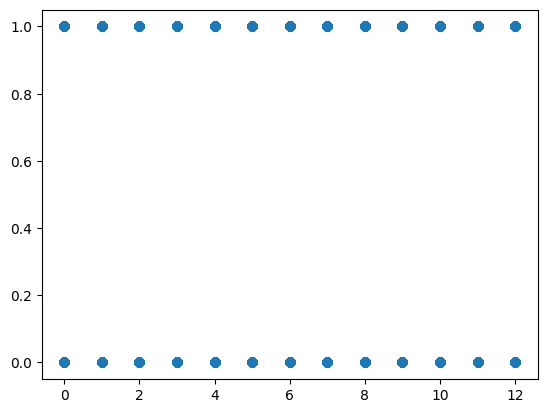

In [20]:
plt.scatter(x_data['Work/Study Hours'], y_data)


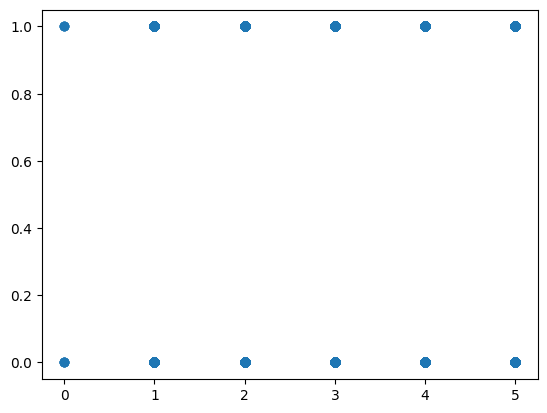

In [21]:
plt.scatter(x_data['Academic Pressure'], y_data)


### Split data into training and validation datasets: Default 80% train, 20% validation

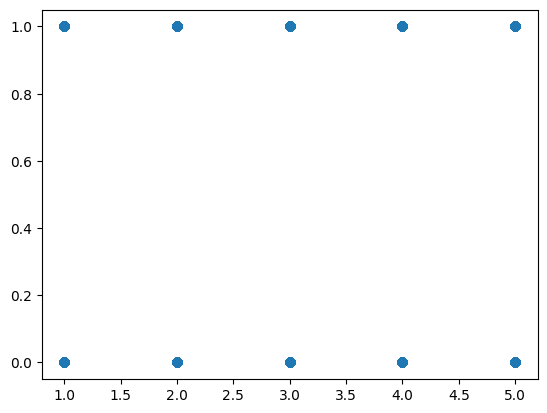

In [22]:
plt.scatter(x_data['Financial Stress'], y_data)


In [23]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

### Visualize how one sample looks like

In [24]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

In [25]:
x_train[0]

array([ 0.  , 18.  ,  3.  ,  0.  ,  9.96,  5.  ,  0.  ,  1.  ,  0.  ,
        1.  ,  2.  ,  4.  ,  1.  ])

### Visualize the nuber of training samples and number of validation samples

In [26]:
len(y_train), len(y_validation)

(22318, 5580)

In [27]:
unique, counts = np.unique(y_train, return_counts=True)
percentage = counts / sum(counts) * 100
print(f"\nTraining set distribution:")
print(f"{counts[0]} samples of 0 (no depression) and {counts[1]} samples of 1 (depression)")
print(f"No depression: {percentage[0]:.1f}% | Depression: {percentage[1]:.1f}%")



Training set distribution:
9250 samples of 0 (no depression) and 13068 samples of 1 (depression)
No depression: 41.4% | Depression: 58.6%


### Visualize the number of no depression vs depression samples in training dataset


#### Having 41.4% samples with no depression and 58.6% samples with depression in our dataset
#### So we have a ratio of 3 no depression samples to 4 depression sample
#### Our training and validation dataset should respect this ratio approximately

In [28]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 9250, 13068]))

#### 9250 samples of 0 (no depression) and 13068 samples of 1 (depression)


### Visualize the number of no depression vs depression samples in validation dataset

#### 2313 samples of 0 (no depression) and 3267 samples of 1 (depression)
##### 3267 * 3/4 = 2400 (aprox)

In [29]:
np.unique(y_validation, return_counts=True)

(array([0, 1]), array([2313, 3267]))

In [30]:
# low_std_cols = ['Work Pressure', 'Job Satisfaction']
# x_data = x_data.drop(columns=low_std_cols)


In [31]:
# Înainte de standardizare, dar după split
# print("Max valori brute din x_validation (înainte de standardizare):")
# print(pd.Series(x_validation.max(axis=0), index=x_data.columns))


In [32]:
# print("\nMax valori standardizate:")
# print(pd.Series(((x_validation - mean) / sigma).max(axis=0), index=x_data.columns))


### Standardization - mean and standard deviation calculation

In [33]:
mean   = np.mean(x_train, axis=0)
sigma  = np.std(x_train, axis=0)

In [34]:
x_train = (x_train - mean) / sigma
# print(pd.Series(sigma, index=x_data.columns))


### Very important! Validation dataset MUST BE standardized using mean and standard deviation calculated from the training dataset

In [35]:
x_validation = (x_validation - mean) / sigma

### View min and max values after standardization from training dataset

In [36]:
x_train.min(), x_train.max()

(np.float64(-5.2007972736442865), np.float64(138.70363362882))

### View min and max values after standardization from training dataset

In [37]:
x_validation.min(), x_validation.max()

(np.float64(-5.2007972736442865), np.float64(138.70363362882))

### Logistic Regression implementation

In [38]:
def sigmoid(x):
    g = 1 / (1 + np.exp(-x))
    return g

#### Examples of using sigmoid values

##### Define and test the sigmoid activation function, used in logistic regression.

##### The sigmoid squashes input values into a range between 0 and 1, suitable for binary classification.

##### !!!!Very large negative values can cause underflow warnings but still return 0.

In [39]:
sigmoid(1)

np.float64(0.7310585786300049)

In [40]:
sigmoid(0)

np.float64(0.5)

In [41]:
sigmoid(-1)

np.float64(0.2689414213699951)

In [42]:
sigmoid(-1000)

C:\Users\Cristina_PC\AppData\Local\Temp\ipykernel_36432\3992194360.py:2: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))


np.float64(0.0)

In [43]:
sigmoid(100)

np.float64(1.0)

In [44]:
def compute_cost(X, y, w, b, lambda_=1):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i) 
             
    cost = cost / m
    return cost

In [45]:
def compute_gradient(X, y, w, b, lambda_=1):
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] += err_i * X[i,j]      #scalar
        dj_db += err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw

In [46]:
def gradient_descent(x_train, y_train, x_validation, y_validation, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_=1):    
    # number of training examples
    m = len(x_train)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_train_history = []
    J_valid_history = []
    w_history = []

    best_train_score = cost_function(x_train, y_train, w_in, b_in, lambda_)
    best_validation_score = cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
    best_w_in_train = copy.deepcopy(w_in)
    best_b_train = copy.deepcopy(b_in)
    best_w_in_valid = copy.deepcopy(w_in)
    best_b_valid = copy.deepcopy(b_in)
    
    for i in range(num_iters):
        
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x_train, y_train, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        
        cost_train =  cost_function(x_train, y_train, w_in, b_in, lambda_)
        J_train_history.append(cost_train)

        cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
        J_valid_history.append(cost_valid)

        if best_train_score > cost_train:
            best_train_score = cost_train
            np.save(f'model/best_train_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_train_b.npy', b_in) 


        if best_validation_score > cost_valid:
            best_validation_score = cost_valid
            np.save(f'model/best_valid_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_valid_b.npy', b_in) 
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost Train: {float(J_train_history[-1].squeeze()):f} \t  Cost Validation: {float(J_valid_history[-1].squeeze()):f}")
        
    return w_in, b_in, J_train_history, J_valid_history, w_history #return w and J,w history for graphing

In [47]:
initial_w = np.zeros(len(x_train[0]))
initial_b = 0

# Some gradient descent settings
iterations = 1000
alpha = 3
lambda_ = 0

w_final, b_final, J_train_history, J_valid_history, _ = gradient_descent(x_train=x_train, y_train=y_train, x_validation=x_validation, y_validation=y_validation, w_in=initial_w, b_in=initial_b, cost_function=compute_cost, gradient_function=compute_gradient, alpha=alpha, num_iters=iterations, lambda_=lambda_)

C:\Users\Cristina_PC\AppData\Local\Temp\ipykernel_36432\2253367060.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err_i * X[i,j]      #scalar


Iteration    0: Cost Train: 0.377005 	  Cost Validation: 0.381656
Iteration  100: Cost Train: 0.350785 	  Cost Validation: 0.358484
Iteration  200: Cost Train: 0.350784 	  Cost Validation: 0.358768
Iteration  300: Cost Train: 0.350784 	  Cost Validation: 0.358941
Iteration  400: Cost Train: 0.350784 	  Cost Validation: 0.359066
Iteration  500: Cost Train: 0.350784 	  Cost Validation: 0.359163
Iteration  600: Cost Train: 0.350784 	  Cost Validation: 0.359244
Iteration  700: Cost Train: 0.350784 	  Cost Validation: 0.359312
Iteration  800: Cost Train: 0.350784 	  Cost Validation: 0.359371
Iteration  900: Cost Train: 0.350784 	  Cost Validation: 0.359423
Iteration  999: Cost Train: 0.350784 	  Cost Validation: 0.359469


In [48]:
best_w_final = np.load('model/best_valid_w_in.npy')
best_b_final = np.load('model/best_valid_b.npy')

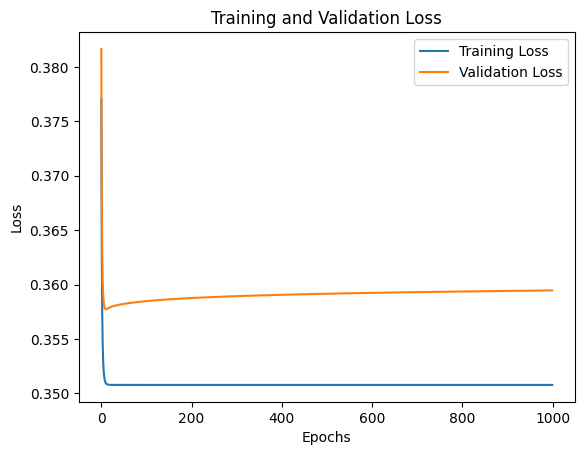

In [49]:
# Generate a sequence of integers to represent the epoch numbers
#epochs = range(1, iterations+1)
 
# Plot and label the training and validation loss values
plt.plot(J_train_history, label='Training Loss')
plt.plot(J_valid_history, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
#plt.xticks(np.arange(0, iterations+1, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [50]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
    
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += X[i][j] * w[j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5
        
    return p

In [51]:
y_predicted = predict(x_train, w_final, b_final)

C:\Users\Cristina_PC\AppData\Local\Temp\ipykernel_36432\7029633.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [52]:
y_train.shape

(22318, 1)

In [53]:
y_train.reshape(-1).shape, y_predicted.shape

((22318,), (22318,))

In [54]:
(y_train.reshape(-1) == y_predicted).sum()

np.int64(18896)

In [55]:
x_train.shape
x_train.shape

(22318, 13)

In [56]:
y_train = y_train.reshape(-1)

In [57]:
type(y_predicted)

numpy.ndarray

In [58]:
def metrics_computations(x:np.array,
                         y_true:np.array,
                         y_predicted: np.array):
    total_number_of_samples = x.shape[0]
    accuracy = (y_true == y_predicted).sum() / total_number_of_samples
    true_positive = ((y_predicted == 1) & (y_true == 1)).sum()
    false_positive = ((y_predicted == 1) & (y_true == 0)).sum()
    false_negative = ((y_predicted == 0) & (y_true == 1)).sum()
    true_negative = ((y_predicted == 0) & (y_true == 0)).sum()
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    f1_score = (2 * precision * recall) / (precision + recall)
    
    false_negative_rate = false_negative / (false_negative + true_positive)
    false_positive_rate = false_positive / (false_positive + true_negative)

    return (accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate)

In [59]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train,
                                                                                                                     y_predicted=y_predicted)

In [60]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 84.67% 
 Precision: 85.69% 
 Recall: 88.61% 
 F1 Score: 87.13% 
 Specificity: 79.09% 
 False Positive Rate: 20.91% 
 False Negative Rate: 11.39%


In [61]:
y_predicted_validation = predict(x_validation, w_final, b_final)

C:\Users\Cristina_PC\AppData\Local\Temp\ipykernel_36432\7029633.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [62]:
y_validation = y_validation.reshape(-1)

In [63]:
for i, j in zip(y_validation, y_predicted_validation):
    print(i, j)

0 1.0
1 1.0
0 0.0
1 0.0
1 1.0
0 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
1 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
1 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 1.0
0 0.0
1 1.0
0 0.0
0 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 1.0
1 1.0
1 0.0
1 1.0
1 1.0
0 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 1.0
1 0.0
1 1.0
1 1.0
0 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 1.0
0 1.0
1 1.0
1 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.

In [64]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation,
                                                                                                                     y_predicted=y_predicted_validation)

In [65]:
print(f"[Valid] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[Valid] Accuracy: 84.50% 
 Precision: 85.68% 
 Recall: 88.28% 
 F1 Score: 86.96% 
 Specificity: 79.16% 
 False Positive Rate: 20.84% 
 False Negative Rate: 11.72%


### Analyze the feature importance

<Axes: ylabel='Feature'>

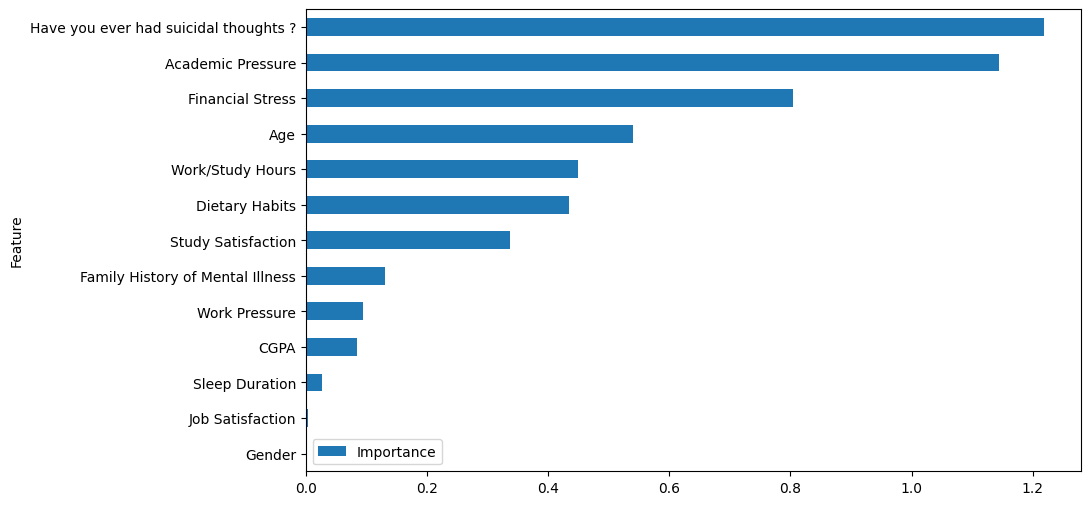

In [66]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': x_data.columns.values, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### Add polynomial features for improving model capacity

In [67]:
#pip install scikit-learn
from sklearn import preprocessing

In [68]:
poly = preprocessing.PolynomialFeatures(2, interaction_only=False, include_bias=False)

In [69]:
poly_values = poly.fit_transform(x_data)
poly_values

array([[ 1., 33.,  5., ...,  1.,  0.,  0.],
       [ 0., 24.,  2., ...,  4.,  2.,  1.],
       [ 1., 31.,  3., ...,  1.,  1.,  1.],
       ...,
       [ 1., 31.,  3., ...,  4.,  0.,  0.],
       [ 0., 18.,  5., ..., 25.,  0.,  0.],
       [ 1., 27.,  4., ...,  9.,  3.,  1.]], shape=(27898, 104))

In [70]:
poly_column_names = list(poly.get_feature_names_out(x_data.columns))
poly_column_names

['Gender',
 'Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Sleep Duration',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Work/Study Hours',
 'Financial Stress',
 'Family History of Mental Illness',
 'Gender^2',
 'Gender Age',
 'Gender Academic Pressure',
 'Gender Work Pressure',
 'Gender CGPA',
 'Gender Study Satisfaction',
 'Gender Job Satisfaction',
 'Gender Sleep Duration',
 'Gender Dietary Habits',
 'Gender Have you ever had suicidal thoughts ?',
 'Gender Work/Study Hours',
 'Gender Financial Stress',
 'Gender Family History of Mental Illness',
 'Age^2',
 'Age Academic Pressure',
 'Age Work Pressure',
 'Age CGPA',
 'Age Study Satisfaction',
 'Age Job Satisfaction',
 'Age Sleep Duration',
 'Age Dietary Habits',
 'Age Have you ever had suicidal thoughts ?',
 'Age Work/Study Hours',
 'Age Financial Stress',
 'Age Family History of Mental Illness',
 'Academic Pressure^2',
 'Academic Pressure Work Pressure',
 'Acad

In [71]:
x_data_poly_df = pd.DataFrame(poly_values, columns=poly_column_names)


In [72]:
x_data = pd.DataFrame(poly_values, columns=poly_column_names)
x_data

Gender   Age  Academic Pressure  Work Pressure  CGPA  \
0         1.0  33.0                5.0            0.0  8.97   
1         0.0  24.0                2.0            0.0  5.90   
2         1.0  31.0                3.0            0.0  7.03   
3         0.0  28.0                3.0            0.0  5.59   
4         0.0  25.0                4.0            0.0  8.13   
...       ...   ...                ...            ...   ...   
27893     0.0  27.0                5.0            0.0  5.75   
27894     1.0  27.0                2.0            0.0  9.40   
27895     1.0  31.0                3.0            0.0  6.61   
27896     0.0  18.0                5.0            0.0  6.88   
27897     1.0  27.0                4.0            0.0  9.24   

       Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                     2.0               0.0             0.0             0.0   
1                     5.0               0.0             0.0             1.0   
2                     5.0               0.0             2.0             0.0   
3                     2.0               0.0             1.0             1.0   
4                     3.0               0.0             0.0             1.0   
...                   ...               ...             ...             ...   
27893                 5.0               0.0             0.0             3.0   
27894                 3.0               0.0             2.0             0.0   
27895                 4.0               0.0             0.0             3.0   
27896                 2.0               0.0             2.0             0.0   
27897                 1.0               0.0             2.0             0.0   

       Have you ever had suicidal thoughts ?  ...  \
0                                        1.0  ...   
1                                        0.0  ...   
2                                        0.0  ...   
3                                        1.0  ...   
4                                        1.0  ...   
...                                      ...  ...   
27893                                    1.0  ...   
27894                                    0.0  ...   
27895                                    0.0  ...   
27896                                    1.0  ...   
27897                                    1.0  ...   

       Have you ever had suicidal thoughts ?^2  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          1.0   
4                                          1.0   
...                                        ...   
27893                                      1.0   
27894                                      0.0   
27895                                      0.0   
27896                                      1.0   
27897                                      1.0   

       Have you ever had suicidal thoughts ? Work/Study Hours  \
0                                                    3.0        
1                                                    0.0        
2                                                    0.0        
3                                                    4.0        
4                                                    1.0        
...                                                  ...        
27893                                                7.0        
27894                                                0.0        
27895                                                0.0        
27896                                               10.0        
27897                                                2.0        

       Have you ever had suicidal thoughts ? Financial Stress  \
0                                                    1.0        
1                                                    0.0        
2                                                    0.0        
3                     

In [71]:
x_data.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

#### Calculam media si deviatia standard
### identificam coloanele cu deviatie standard 0 si le eliminam

In [83]:
# Calculam media și deviația standard
mean = np.mean(x_data, axis=0)
sigma = np.std(x_data, axis=0)


zero_std_indices = np.where(sigma == 0)[0]
print("Coloane cu std=0:", zero_std_indices)


x_data = np.delete(x_data, zero_std_indices, axis=1)
mean = np.delete(mean, zero_std_indices)
sigma = np.delete(sigma, zero_std_indices)
x_data

Coloane cu std=0: []


array([[ 1., 33.,  5., ...,  3.,  1.,  0.],
       [ 0., 24.,  2., ...,  3.,  2.,  1.],
       [ 1., 31.,  3., ...,  9.,  1.,  1.],
       ...,
       [ 1., 31.,  3., ..., 12.,  2.,  0.],
       [ 0., 18.,  5., ..., 10.,  5.,  0.],
       [ 1., 27.,  4., ...,  2.,  3.,  1.]], shape=(27898, 13))

In [84]:
# x_train, x_validation, y_train, y_validation = train_test_split(
#     x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# x_train = x_train.astype(float)
# x_validation = x_validation.astype(float)
# y_train = y_train.to_numpy().reshape(-1)
# y_validation = y_validation.to_numpy().reshape(-1)


In [85]:
# x_train = (x_train - mean) / sigma
# x_validation = (x_validation - mean) / sigma


In [86]:
# x_data.columns

In [87]:
# zero_std_indices = np.where(sigma == 0)[0]
# print("Coloane cu std=0:", zero_std_indices)

In [88]:
# x_train = np.delete(x_train, zero_std_indices, axis=1)
# x_validation = np.delete(x_validation, zero_std_indices, axis=1)
# mean = np.delete(mean, zero_std_indices)
# sigma = np.delete(sigma, zero_std_indices)

In [89]:
# x_train = (x_train - mean) / sigma
# x_validation = (x_validation - mean) / sigma

### Split data into training and validation datasets: Default 80% train, 20% validation

In [90]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [94]:
# x_train = x_train.to_numpy()
# x_validation = x_validation.to_numpy()
# y_train = y_train.to_numpy()
# y_validation = y_validation.to_numpy()

In [164]:
x_train = x_train.astype(float)
x_validation = x_validation.astype(float)
y_train = y_train.to_numpy().reshape(-1)
y_validation = y_validation.to_numpy().reshape(-1)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

### Visualize how one sample looks like

In [96]:
x_train[0]

array([ 0.  , 18.  ,  3.  ,  0.  ,  9.96,  5.  ,  0.  ,  1.  ,  0.  ,
        1.  ,  2.  ,  4.  ,  1.  ])

### Visualize the nuber of training samples and number of validation samples

In [97]:
len(y_train), len(y_validation)

(22318, 5580)

### Visualize the number of no depression vs depression samples in training dataset

#### Having 41.4% samples with no depression and 58.6%  samples with depression in our dataset
#### So we have a ratio of 3 no depression samples to 4 depression sample
#### Our training and validation dataset should respect this ratio approximately

In [98]:
# np.unique(y_train, return_counts=True)

#### 9250 samples of 0 (no depression) and 13068 samples of 1 (depression)


### Visualize the number of no depression vs depression samples in validation dataset

In [99]:
# np.unique(y_validation, return_counts=True)

### Standardization - mean and standard deviation calculation

In [100]:
mean   = np.mean(x_train, axis=0)
sigma  = np.std(x_train, axis=0)

In [101]:
# zero_std_indices = np.where(sigma == 0)[0]
# print("Coloane cu std=0:", zero_std_indices)

# x_train = np.delete(x_train, zero_std_indices, axis=1)
# x_validation = np.delete(x_validation, zero_std_indices, axis=1)
# mean = np.delete(mean, zero_std_indices)
# sigma = np.delete(sigma, zero_std_indices)


In [102]:
x_train = (x_train - mean) / sigma

### Very important! Validation dataset MUST BE standardized using mean and standard deviation calculated from the training dataset

In [103]:
x_validation = (x_validation - mean) / sigma

### View min and max values after standardization from training dataset

In [104]:
x_train.min(), x_train.max()

(np.float64(-5.200797273644554), np.float64(138.7036336288252))

### View min and max values after standardization from training dataset

In [105]:
x_validation.min(), x_validation.max()

(np.float64(-5.200797273644554), np.float64(138.7036336288252))

### Train with polynomial features

In [106]:
def gradient_descent(x_train, y_train, x_validation, y_validation, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_=1):    
    # number of training examples
    m = len(x_train)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_train_history = []
    J_valid_history = []
    w_history = []

    best_train_score = cost_function(x_train, y_train, w_in, b_in, lambda_)
    best_validation_score = cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
    best_w_in_train = copy.deepcopy(w_in)
    best_b_train = copy.deepcopy(b_in)
    best_w_in_valid = copy.deepcopy(w_in)
    best_b_valid = copy.deepcopy(b_in)
    
    for i in range(num_iters):
        
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x_train, y_train, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        
        cost_train =  cost_function(x_train, y_train, w_in, b_in, lambda_)
        J_train_history.append(cost_train)

        cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
        J_valid_history.append(cost_valid)

        if best_train_score > cost_train:
            best_train_score = cost_train
            np.save(f'model/best_poly_train_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_poly_train_b.npy', b_in) 


        if best_validation_score > cost_valid:
            best_validation_score = cost_valid
            np.save(f'model/best_poly_valid_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_poly_valid_b.npy', b_in) 
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost Train: {float(J_train_history[-1].squeeze()):f} \t  Cost Validation: {float(J_valid_history[-1].squeeze()):f}")
        
    return w_in, b_in, J_train_history, J_valid_history, w_history #return w and J,w history for graphing

In [107]:
initial_w = np.zeros(len(x_train[0]))
initial_b = 0

# Some gradient descent settings
iterations = 10
alpha = 0.3
lambda_ = 0

w_final, b_final, J_train_history, J_valid_history, _ = gradient_descent(x_train=x_train, y_train=y_train, x_validation=x_validation, y_validation=y_validation, w_in=initial_w, b_in=initial_b, cost_function=compute_cost, gradient_function=compute_gradient, alpha=alpha, num_iters=iterations, lambda_=lambda_)

Iteration    0: Cost Train: 0.634392 	  Cost Validation: 0.634617
Iteration    1: Cost Train: 0.588704 	  Cost Validation: 0.589178
Iteration    2: Cost Train: 0.552857 	  Cost Validation: 0.553585
Iteration    3: Cost Train: 0.524378 	  Cost Validation: 0.525355
Iteration    4: Cost Train: 0.501441 	  Cost Validation: 0.502658
Iteration    5: Cost Train: 0.482715 	  Cost Validation: 0.484162
Iteration    6: Cost Train: 0.467232 	  Cost Validation: 0.468896
Iteration    7: Cost Train: 0.454281 	  Cost Validation: 0.456148
Iteration    8: Cost Train: 0.443332 	  Cost Validation: 0.445391
Iteration    9: Cost Train: 0.433988 	  Cost Validation: 0.436227


In [108]:
best_poly_w_final = np.load('model/best_poly_valid_w_in.npy')
best_poly_b_final = np.load('model/best_poly_valid_b.npy')

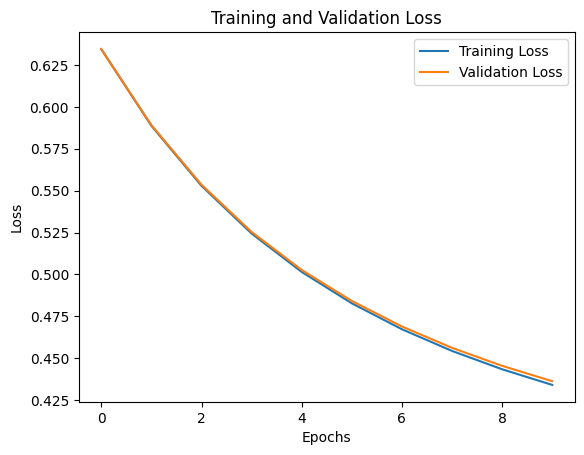

In [109]:
# Generate a sequence of integers to represent the epoch numbers
#epochs = range(1, iterations+1)
 
# Plot and label the training and validation loss values
plt.plot(J_train_history, label='Training Loss')
plt.plot(J_valid_history, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
#plt.xticks(np.arange(0, iterations+1, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [110]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
    
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += X[i][j] * w[j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5
        
    return p

In [111]:
y_predicted = predict(x_train, w_final, b_final)

In [112]:
y_train.shape

(22318,)

In [113]:
y_train.reshape(-1).shape, y_predicted.shape

((22318,), (22318,))

In [114]:
(y_train.reshape(-1) == y_predicted).sum()

np.int64(18859)

In [115]:
y_train = y_train.reshape(-1)

In [116]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train,
                                                                                                                     y_predicted=y_predicted)

In [117]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 84.50% 
 Precision: 86.39% 
 Recall: 87.28% 
 F1 Score: 86.83% 
 Specificity: 80.57% 
 False Positive Rate: 19.43% 
 False Negative Rate: 12.72%


In [118]:
y_predicted_validation = predict(x_validation, w_final, b_final)

In [119]:
y_validation = y_validation.reshape(-1)

In [120]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation,
                                                                                                                     y_predicted=y_predicted_validation)

In [121]:
print(f"[VALID] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[VALID] Accuracy: 84.30% 
 Precision: 86.44% 
 Recall: 86.81% 
 F1 Score: 86.62% 
 Specificity: 80.76% 
 False Positive Rate: 19.24% 
 False Negative Rate: 13.19%


### Analyze the feature importance

In [125]:
coefficients = coefficients.flatten()


<Axes: ylabel='Feature'>

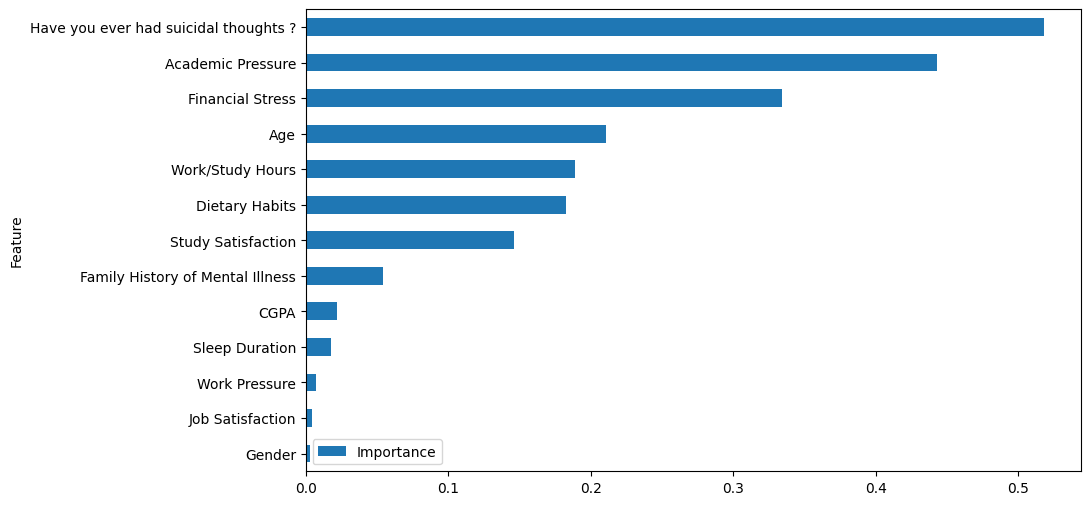

In [153]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': x_data.columns.tolist(), 'Importance': np.abs(coefficients)})

feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.tail(20).plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

#### For example most important feature is obtained by multipling two features: Total day minutes and Customer service calls

### Decision Tree 
#### Specialized in learning non-linear data
#### No need for Normalization/Standardization
#### No need for Polynomial Feature Transformation

In [154]:
x_data = data.drop(columns=['Depression'])

### Split data into training and validation datasets: Default 80% train, 20% validation

In [155]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [156]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

### Visualize how one sample looks like

In [157]:
x_train[0]

array([ 0.  , 18.  ,  3.  ,  0.  ,  9.96,  5.  ,  0.  ,  1.  ,  0.  ,
        1.  ,  2.  ,  4.  ,  1.  ])

### Visualize the nuber of training samples and number of validation samples

In [158]:
len(y_train), len(y_validation)

(22318, 5580)

### Visualize the number of no churn vs churn samples in training dataset

#### Having 41.4% samples with no depression and 58.6% samples with depression in our dataset
#### So we have a ratio of 3 no depression samples to 4 depression sample
#### Our training and validation dataset should respect this ratio approximately

In [159]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 9250, 13068]))

### Visualize the number of no depression vs depression samples in validation dataset

In [160]:
np.unique(y_validation, return_counts=True)

(array([0, 1]), array([2313, 3267]))

In [161]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

### Decision Tree Code and Implementation

#### Declare Decision Tree with corresponding Hyperparameters

In [165]:
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=5)

In [166]:
type(x_train)

numpy.ndarray

#### Train the Decision Tree

In [167]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Predict on the training dataset 

In [168]:
y_predicted = classifier.predict(x_train)
y_predicted = np.array(y_predicted)

### Display training metrics

In [169]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train.reshape(-1),
                                                                                                                     y_predicted=y_predicted)

In [170]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 82.94% 
 Precision: 83.36% 
 Recall: 88.53% 
 F1 Score: 85.87% 
 Specificity: 75.04% 
 False Positive Rate: 24.96% 
 False Negative Rate: 11.47%


### Display validation metrics

In [171]:
y_predicted_valid = classifier.predict(x_validation)
y_predicted_valid = np.array(y_predicted_valid)

In [172]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation.reshape(-1),
                                                                                                                     y_predicted=y_predicted_valid)

In [173]:
print(f"[VALID] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[VALID] Accuracy: 82.31% 
 Precision: 82.52% 
 Recall: 88.55% 
 F1 Score: 85.43% 
 Specificity: 73.50% 
 False Positive Rate: 26.50% 
 False Negative Rate: 11.45%


### Display Decision Tree and Learned rules by the Tree 

In [174]:
list(x_data.columns)

['Gender',
 'Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Sleep Duration',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Work/Study Hours',
 'Financial Stress',
 'Family History of Mental Illness']

In [175]:
from sklearn.tree import plot_tree


In [176]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(70,50), dpi=300)
plot_tree(classifier, filled=True, fontsize=20, feature_names=list(x_data.columns),rounded=True, ax=axes)
plt.savefig('decisionTree.png')

In [177]:
text_representation = export_text(classifier, feature_names=list(x_data.columns), class_names=['No Depression', 'Depression'])
print(text_representation)

|--- Have you ever had suicidal thoughts ? <= 0.50
|   |--- Academic Pressure <= 3.50
|   |   |--- Financial Stress <= 2.50
|   |   |   |--- Academic Pressure <= 2.50
|   |   |   |   |--- Work/Study Hours <= 6.50
|   |   |   |   |   |--- class: No Depression
|   |   |   |   |--- Work/Study Hours >  6.50
|   |   |   |   |   |--- class: No Depression
|   |   |   |--- Academic Pressure >  2.50
|   |   |   |   |--- Dietary Habits <= 2.00
|   |   |   |   |   |--- class: No Depression
|   |   |   |   |--- Dietary Habits >  2.00
|   |   |   |   |   |--- class: No Depression
|   |   |--- Financial Stress >  2.50
|   |   |   |--- Academic Pressure <= 1.50
|   |   |   |   |--- Dietary Habits <= 2.50
|   |   |   |   |   |--- class: No Depression
|   |   |   |   |--- Dietary Habits >  2.50
|   |   |   |   |   |--- class: No Depression
|   |   |   |--- Academic Pressure >  1.50
|   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |--- class: No Depression
|   |   |   |   |--- Age >  24.50
|   |   

In [178]:
from sklearn.tree import _tree

In [179]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [181]:
rules = get_rules(classifier, feature_names=list(x_data.columns), class_names=['No Depression', 'Depression'])
for r in rules:
    print(r)

if (Have you ever had suicidal thoughts ? > 0.5) and (Academic Pressure > 2.5) and (Financial Stress > 2.5) and (Academic Pressure > 3.5) and (Dietary Habits > 0.5) then class: Depression (proba: 96.51%) | based on 3,897 samples
if (Have you ever had suicidal thoughts ? > 0.5) and (Academic Pressure > 2.5) and (Financial Stress > 2.5) and (Academic Pressure <= 3.5) and (Age <= 29.5) then class: Depression (proba: 91.02%) | based on 2,249 samples
if (Have you ever had suicidal thoughts ? <= 0.5) and (Academic Pressure <= 3.5) and (Financial Stress > 2.5) and (Academic Pressure > 1.5) and (Age > 24.5) then class: No Depression (proba: 80.61%) | based on 1,171 samples
if (Have you ever had suicidal thoughts ? > 0.5) and (Academic Pressure > 2.5) and (Financial Stress > 2.5) and (Academic Pressure > 3.5) and (Dietary Habits <= 0.5) then class: Depression (proba: 90.31%) | based on 1,115 samples
if (Have you ever had suicidal thoughts ? > 0.5) and (Academic Pressure > 2.5) and (Financial St